### 1. MNIST Data Load

In [1]:
import sys
import numpy as np
%matplotlib inline

sys.path.append('/Users/yhhan/git/deeplink')

In [2]:
from datasets.mnist import MNIST_Data

In [3]:
data = MNIST_Data(validation_size=5000, n_splits=1, is_onehot_target=False, cnn=True)
print(data.train_input.shape)
print(data.train_target.shape)
print()
print(data.validation_input.shape)
print(data.validation_target.shape)
print()
print(data.test_input.shape)
print(data.test_target.shape)

(55000, 1, 28, 28)
(55000,)

(5000, 1, 28, 28)
(5000,)

(10000, 1, 28, 28)
(10000,)


In [4]:
data.train_input = data.train_input.reshape(55000, 784) 
data.validation_input = data.validation_input.reshape(5000, 784)
data.test_input = data.test_input.reshape(10000, 784)
print(data.train_input.shape)
print(data.train_target.shape)
print()
print(data.validation_input.shape)
print(data.validation_target.shape)
print()
print(data.test_input.shape)
print(data.test_target.shape)

(55000, 784)
(55000,)

(5000, 784)
(5000,)

(10000, 784)
(10000,)


### 2. Standardize the Data
- PCA is effected by scale so you need to scale the features in the data before applying PCA. 
- You can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 
- StandardScaler helps standardize the dataset’s features. 
- Note you fit on the training set and transform on the training and test set.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(data.train_input)

data.train_input = scaler.transform(data.train_input)
data.validation_input = scaler.transform(data.validation_input)
data.test_input = scaler.transform(data.test_input)

### 3. Import and Apply PCA Simply with 2 Principlal Components

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_transformed = pca.fit_transform(data.train_input)

print(X_transformed.shape)
print(pca.explained_variance_ratio_)

(55000, 2)
[ 0.05664462  0.04082733]


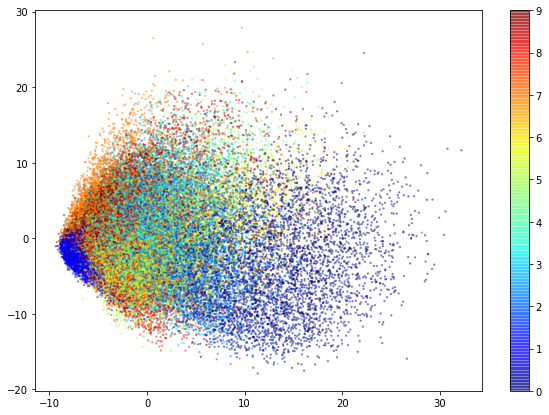

In [7]:
fig, plot = plt.subplots()
fig.set_size_inches(10, 7)

a = plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=data.train_target, 
                 edgecolor='none', alpha=0.5, cmap=plt.cm.jet, s=5)

plt.colorbar(mappable=a)
plt.show()

### 3. Import and Apply PCA with 90% of the variance is retained

[ 0.05664462  0.04082733  0.0374779   0.02891263  0.02524749  0.02206339
  0.01924552  0.01747001  0.01539436  0.01403895  0.01341889  0.01213944
  0.01123337  0.01089445  0.01027524  0.00997441  0.009367    0.009246
  0.00898183  0.00871162  0.00826723  0.00804276  0.007666    0.00747421
  0.00717783  0.00696165  0.00687968  0.00653038  0.00631408  0.0061633
  0.00596644  0.00589041  0.00574528  0.00565875  0.00557058  0.00539894
  0.00533151  0.00519808  0.00507305  0.00483376  0.0047856   0.00469066
  0.00453005  0.00450323  0.00447112  0.00441156  0.00437682  0.00431828
  0.0042662   0.00419066  0.00405855  0.00400416  0.00396725  0.00394846
  0.00386641  0.00377168  0.00372849  0.00366503  0.00363953  0.00359472
  0.0035217   0.00347371  0.00346372  0.00339753  0.00335838  0.00330408
  0.00328041  0.00319074  0.00316838  0.00312872  0.00308989  0.00306126
  0.00303272  0.00302521  0.00299233  0.00296128  0.00292135  0.00290654
  0.00287883  0.00286543  0.00284136  0.00281467  0.00

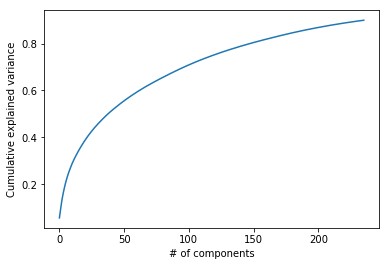

In [8]:
pca = PCA(n_components=236)
pca_full_1 = pca.fit(data.train_input)

print(pca_full_1.explained_variance_ratio_)
print(np.sum(pca_full_1.explained_variance_ratio_))

plt.plot(np.cumsum(pca_full_1.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')
plt.show()

- Notice the code below let scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

236
[ 0.05664462  0.04082733  0.0374779   0.02891263  0.02524749  0.02206339
  0.01924552  0.01747001  0.01539436  0.01403895  0.01341889  0.01213944
  0.01123337  0.01089445  0.01027524  0.00997441  0.009367    0.009246
  0.00898183  0.00871162  0.00826723  0.00804276  0.007666    0.00747421
  0.00717783  0.00696165  0.00687968  0.00653038  0.00631408  0.0061633
  0.00596644  0.00589041  0.00574528  0.00565875  0.00557058  0.00539894
  0.00533151  0.00519808  0.00507305  0.00483376  0.0047856   0.00469066
  0.00453005  0.00450323  0.00447112  0.00441156  0.00437682  0.00431828
  0.0042662   0.00419066  0.00405855  0.00400416  0.00396725  0.00394846
  0.00386641  0.00377169  0.00372849  0.00366503  0.00363953  0.00359472
  0.0035217   0.00347372  0.00346372  0.00339753  0.00335838  0.00330408
  0.00328042  0.00319074  0.00316838  0.00312872  0.00308989  0.00306126
  0.00303272  0.00302522  0.00299234  0.00296128  0.00292135  0.00290655
  0.00287884  0.00286544  0.00284136  0.00281468  

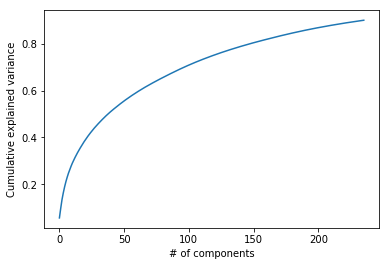

In [9]:
pca = PCA(n_components=0.90)
pca_full_2 = pca.fit(data.train_input)

print(pca_full_2.n_components_)
print(pca_full_2.explained_variance_ratio_)
print(np.sum(pca_full_2.explained_variance_ratio_))

plt.plot(np.cumsum(pca_full_2.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')
plt.show()

- Apply the mapping (transform) to the training set, validation set, and the test set.

In [10]:
transformed_train_input = pca.transform(data.train_input)
transformed_validation_input = pca.transform(data.validation_input)
transformed_test_input = pca.transform(data.test_input)

### 4. Apply Logistic Regression to the Transformed Data

- Step 1: Make an instance of the Model.
  - The default logistic regressior is very slow which is why it was changed to 'lbfgs'

In [11]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

- Step 2: Training the model on the data, storing the information learned from the data
  - Model is learning the relationship between digits and labels

In [12]:
logisticRegr.fit(transformed_train_input, data.train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

- Step 3. Predict the labels of new data (new images)

In [13]:
result = logisticRegr.predict(transformed_validation_input[0].reshape(1, -1))
print(result, data.validation_target[0])

result = logisticRegr.predict(transformed_validation_input[1].reshape(1, -1))
print(result, data.validation_target[1])

print()

result = logisticRegr.predict(transformed_test_input[0].reshape(1, -1))
print(result, data.test_target[0])

result = logisticRegr.predict(transformed_test_input[1].reshape(1, -1))
print(result, data.test_target[1])

print()

result = logisticRegr.predict(transformed_test_input[:30])
print(result)
print(data.test_target[:30])

[ 5.] 5.0
[ 0.] 0.0

[ 7.] 7.0
[ 2.] 2.0

[ 7.  2.  1.  0.  4.  1.  4.  9.  6.  9.  0.  6.  9.  0.  1.  5.  9.  7.
  5.  4.  9.  6.  6.  5.  4.  0.  7.  4.  0.  1.]
[ 7.  2.  1.  0.  4.  1.  4.  9.  5.  9.  0.  6.  9.  0.  1.  5.  9.  7.
  3.  4.  9.  6.  6.  5.  4.  0.  7.  4.  0.  1.]


- Step 4. Measure Model Performance

In [14]:
print(logisticRegr.score(transformed_validation_input, data.validation_target))
print(logisticRegr.score(transformed_test_input, data.test_target))

0.9174
0.9187


### 5. Timing of Fitting Logistic Regression after PCA

In [15]:
import timeit

retained_variance_list = [0.999, 0.95, 0.90, 0.80, 0.70, 0.60, 0.50]

for rv in retained_variance_list:
    start_time = timeit.default_timer()
    pca = PCA(n_components=rv)
    pca_full = pca.fit(data.train_input)
    
    transformed_train_input = pca.transform(data.train_input)
    transformed_test_input = pca.transform(data.test_input)
    
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    logisticRegr.fit(transformed_train_input, data.train_target)
    elapsed = timeit.default_timer() - start_time

    print("Retained Variance: {0:4.2f}, Number of PCs: {1:3d}, Elapsed Time: {2:4.1f}sec., Prediction Score: {3:6.4f}".format(
        rv,
        pca_full.n_components_,
        elapsed,
        logisticRegr.score(transformed_test_input, data.test_target)
    ))

Retained Variance: 1.00, Number of PCs: 679, Elapsed Time: 60.5sec., Prediction Score: 0.9183
Retained Variance: 0.95, Number of PCs: 330, Elapsed Time: 38.5sec., Prediction Score: 0.9216
Retained Variance: 0.90, Number of PCs: 236, Elapsed Time: 30.4sec., Prediction Score: 0.9187
Retained Variance: 0.80, Number of PCs: 148, Elapsed Time: 26.3sec., Prediction Score: 0.9143
Retained Variance: 0.70, Number of PCs:  98, Elapsed Time: 21.1sec., Prediction Score: 0.9091
Retained Variance: 0.60, Number of PCs:  63, Elapsed Time: 16.6sec., Prediction Score: 0.9004
Retained Variance: 0.50, Number of PCs:  39, Elapsed Time: 12.9sec., Prediction Score: 0.8888
